<a href="https://colab.research.google.com/github/llll121/Introduction-to-ML/blob/main/Week4Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1. Loading the Dataset 

In [2]:
breast_canser = load_breast_cancer()
# print(breast_canser.DESCR)

## 2. Checking the Sample and Target Sizes

In [3]:
print(breast_canser.data.shape)
print(breast_canser.target.shape)

(569, 30)
(569,)


## 3. Splitting the Data for Training and Testing

In [4]:
breast_canser_df = pd.DataFrame(breast_canser.data,
                                columns=breast_canser.feature_names)
breast_canser_df['type'] = pd.Series(breast_canser.target)

In [5]:
X = breast_canser_df.iloc[:,:30]
y = breast_canser_df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## 4. Training and Testing Set Sizes (Feature scaling)

In [6]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## 5 Creating the Model

In [7]:
classifier = GaussianNB()

## 6 Training the Model with NB

In [8]:
classifier.fit(X_train,y_train)

GaussianNB()

## 7. Predicting

In [9]:
y_pred = classifier.predict(X_test)

## 8. Estimator Method score

In [10]:
print(f'{classifier.score(X_test, y_test):.2%}')

93.86%


## 9. Confusion Matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  4]
 [ 3 63]]


## 10. Classification Report

In [12]:
target_names = ['benign','malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.94      0.92      0.93        48
   malignant       0.94      0.95      0.95        66

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



## 11. Visualizing the Confusion Matrix

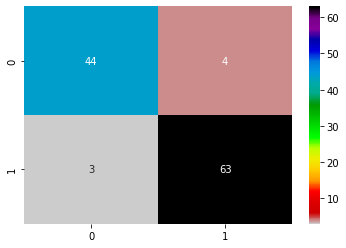

In [13]:
confusion_df = pd.DataFrame(cm, index=range(2),columns=range(2))
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

## 12. Running Multiple Models to Find the Best One:   
## +
## Using the KFold Object with Function cross_val_score: 

In [14]:
estimators = {'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=10, p=2, metric='euclidean'), 
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')}

In [15]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=X, 
                             y=y,
                             cv=kfold)
    
    print(f'{estimator_name:>20}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

          GaussianNB: mean of r2 scores=0.938
KNeighborsClassifier: mean of r2 scores=0.935
  LogisticRegression: mean of r2 scores=0.951
                 SVC: mean of r2 scores=0.919
